# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 53:**  
Period = 3.1773254250  
tdepth = 0.0524934405**2
   
  - **Sector 54:**  
Period = 3.1773782758   
tdepth = 0.0599569128**2

In [2]:
ID = 289373041
sectors = np.array([53])

period = 3.1773254250
tdepth = 0.0524934405**2

lc = pd.read_csv("TOI_4090_53.csv", header=None)
contrastcurve_file = "Palomar_5m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

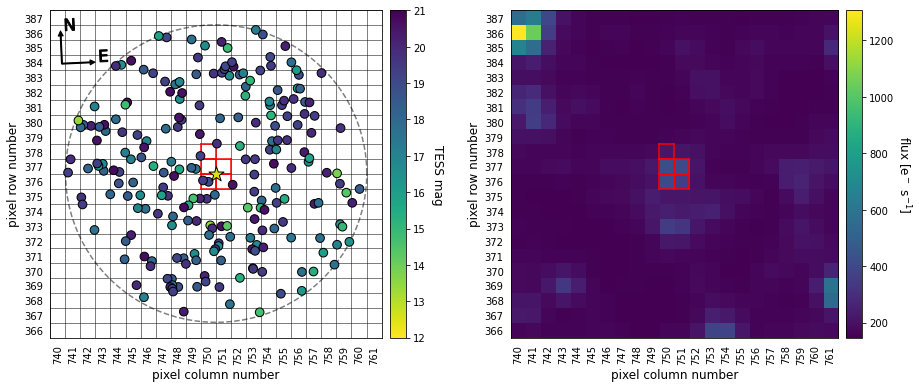

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,289373041,12.5509,11.638,11.168,11.071,278.232203,39.637987,0.76,0.819411,4740.0,3.955390,0.000,0.000
1,1550457907,19.1171,NaN,NaN,NaN,278.228288,39.634966,NaN,NaN,NaN,1.000380,15.367,224.946
2,1550457900,19.3789,NaN,NaN,NaN,278.225592,39.635522,NaN,NaN,3995.0,0.965480,20.365,244.170
3,1550457902,20.5675,NaN,NaN,NaN,278.240059,39.633712,NaN,NaN,NaN,NaN,26.669,125.240
4,289373038,17.1424,16.321,15.907,15.856,278.222357,39.639842,0.90,1.074250,5247.0,0.231153,28.101,283.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,289455608,17.5901,15.336,14.795,14.520,278.288198,39.603210,NaN,NaN,NaN,NaN,199.458,128.861
223,1550459723,19.7745,NaN,NaN,NaN,278.286157,39.674711,NaN,NaN,NaN,-0.315728,199.599,48.503
224,289455617,16.4526,15.627,15.103,15.205,278.296011,39.611596,0.89,1.019500,5210.0,0.408627,200.824,118.214
225,1550457951,19.3722,NaN,NaN,NaN,278.159556,39.639356,NaN,NaN,NaN,0.566075,201.459,271.425


In [4]:
ap = np.array([[750, 376], [751, 376], [750, 377], [751, 377], [750, 378]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,289373041,12.5509,11.638,11.168,11.071,278.232203,39.637987,0.76,0.819411,4740.0,3.955390,0.000,0.000,9.669776e-01,0.00285
1,1550457907,19.1171,NaN,NaN,NaN,278.228288,39.634966,NaN,NaN,NaN,1.000380,15.367,224.946,1.722692e-03,0.00000
2,1550457900,19.3789,NaN,NaN,NaN,278.225592,39.635522,NaN,NaN,3995.0,0.965480,20.365,244.170,1.113184e-03,0.00000
3,1550457902,20.5675,NaN,NaN,NaN,278.240059,39.633712,NaN,NaN,NaN,NaN,26.669,125.240,2.373777e-04,0.00000
4,289373038,17.1424,16.321,15.907,15.856,278.222357,39.639842,0.90,1.074250,5247.0,0.231153,28.101,283.752,6.100554e-03,0.45169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,289455608,17.5901,15.336,14.795,14.520,278.288198,39.603210,NaN,NaN,NaN,NaN,199.458,128.861,1.944480e-33,0.00000
223,1550459723,19.7745,NaN,NaN,NaN,278.286157,39.674711,NaN,NaN,NaN,-0.315728,199.599,48.503,6.864114e-33,0.00000
224,289455617,16.4526,15.627,15.103,15.205,278.296011,39.611596,0.89,1.019500,5210.0,0.408627,200.824,118.214,2.150324e-33,0.00000
225,1550457951,19.3722,NaN,NaN,NaN,278.159556,39.639356,NaN,NaN,NaN,0.566075,201.459,271.425,7.964532e-35,0.00000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

289373038
289373051
289373024


# Ploting CC File

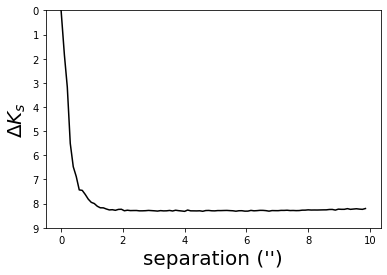

In [7]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [8]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 289373041.
Calculating EB and EBx2P scenario probabilities for 289373041.
Calculating PTP scenario probability for 289373041.
Calculating PEB and PEBx2P scenario probabilities for 289373041.
Calculating STP scenario probability for 289373041.
Calculating SEB and SEBx2P scenario probabilities for 289373041.
Calculating DTP scenario probability for 289373041.
Calculating DEB and DEBx2P scenario probabilities for 289373041.
Calculating BTP scenario probability for 289373041.
Calculating BEB and BEBx2P scenario probabilities for 289373041.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 289373038.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 289373051.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 289373024.
Wall time: 59min 59s


In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.04370541018261076
NFPP =  0.028449329163311932


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,289373041,TP,0.760000,0.819411,3.177325,89.609810,0.073270,0.065130,286.248944,4.972289,0.000000,0.000000,8.451330e-01
1,289373041,EB,0.760000,0.819411,3.177325,86.002992,0.510537,0.703470,202.245770,0.000000,0.120397,0.147430,2.759671e-08
2,289373041,EBx2P,0.760000,0.819411,6.354651,86.399515,0.915991,0.677150,201.953687,0.000000,0.728661,0.759853,1.191635e-04
3,289373041,PTP,0.760000,0.819411,3.177325,88.689179,0.231847,0.003476,189.217303,5.019724,0.000000,0.000000,9.268107e-02
4,289373041,PEB,0.760000,0.819411,3.177325,86.295694,0.364241,0.759267,195.657899,0.000000,0.107005,0.129840,1.161899e-12
5,289373041,PEBx2P,0.760000,0.819411,6.354651,86.931759,0.542911,0.731615,185.789294,0.000000,0.750096,0.780360,1.792295e-07
6,289373041,STP,0.646766,0.669500,3.177325,87.689037,0.569073,0.534168,229.316473,7.925288,0.000000,0.000000,4.255458e-03
7,289373041,SEB,0.276965,0.298125,3.177325,89.694274,0.079450,0.629471,190.796956,0.000000,0.085558,0.100000,5.992132e-03
8,289373041,SEBx2P,0.189964,0.220797,6.354651,88.643067,0.485895,0.871233,210.870657,0.000000,0.183483,0.214771,1.894342e-03
9,289373041,DTP,0.760000,0.819411,3.177325,88.670127,0.235680,0.002526,274.603007,5.010266,0.000000,0.000000,1.848056e-02


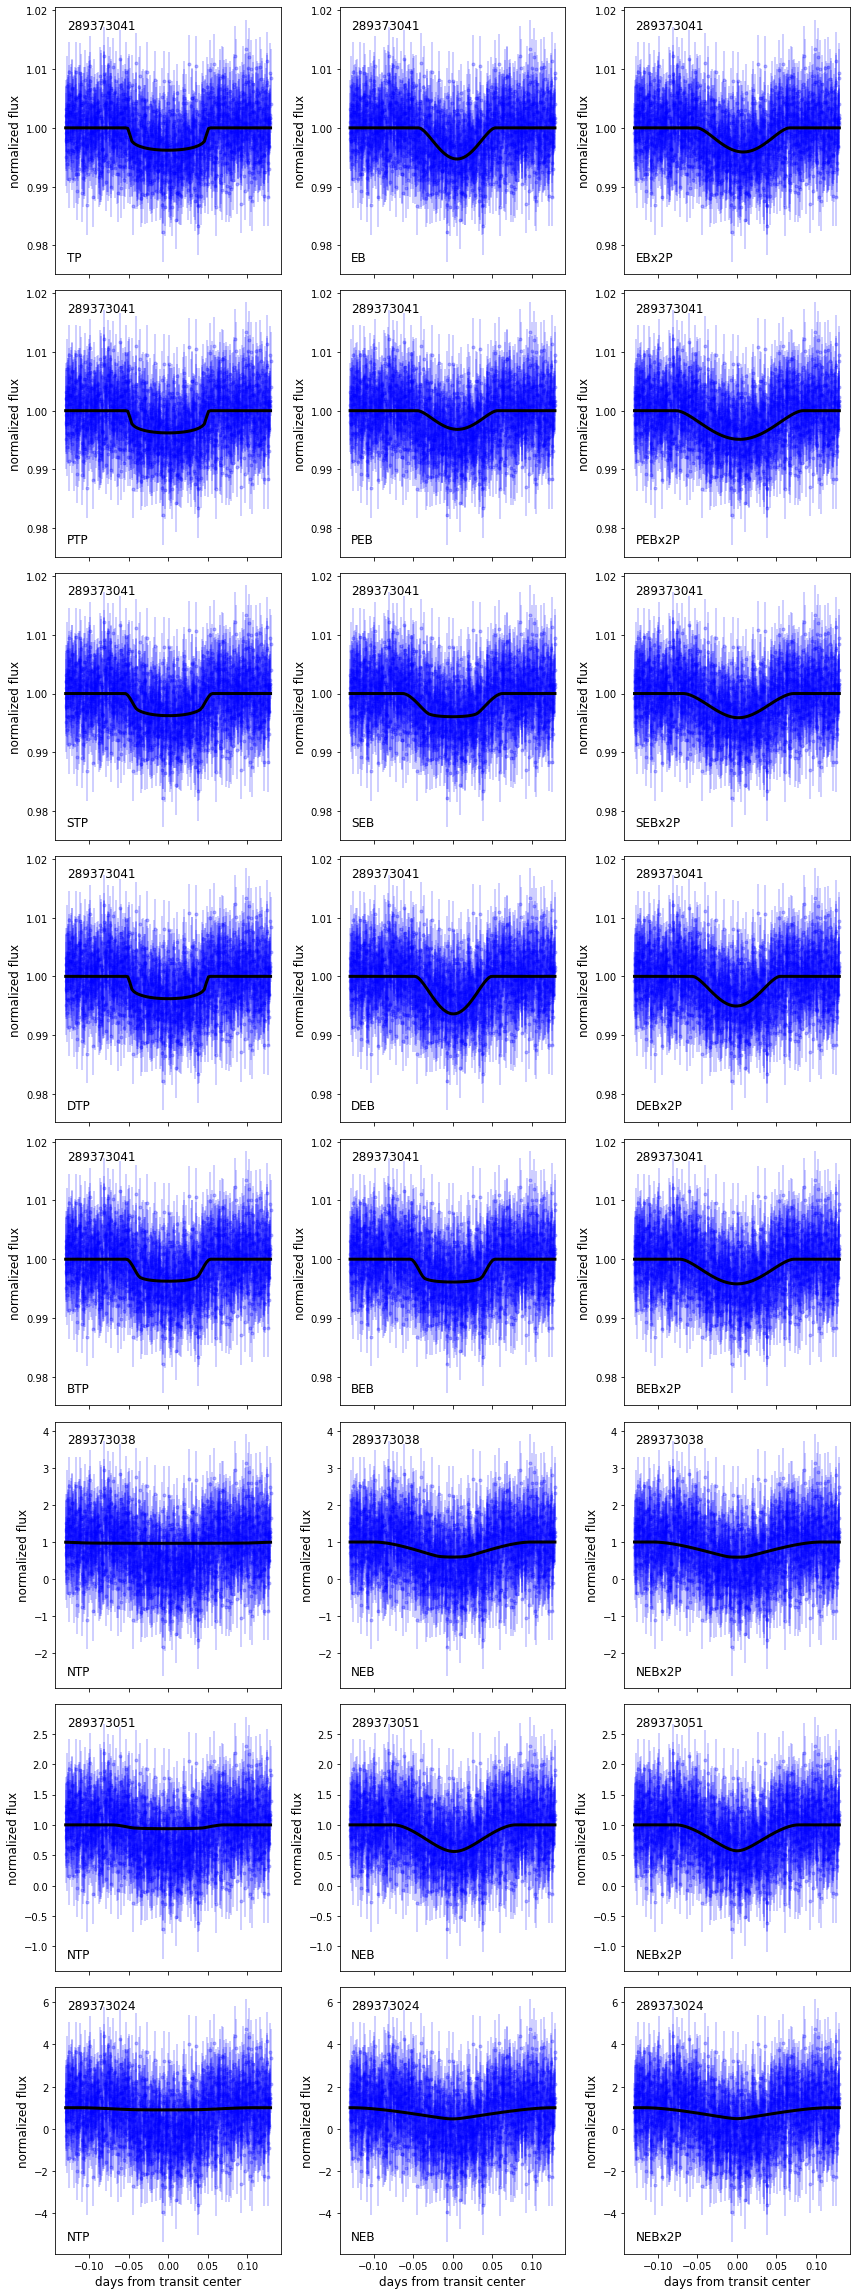

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))